**Example 2.3**
Find a set of state variable equations for the following system. Let k = 15, m = 10, and b = 8. Assume that an input force of 40 pulls the mass to the right.  Let x(0) = 1 and v(0) = 0.5. Numerically solve the state variable equations. Then, use conservation of energy to verify the results.

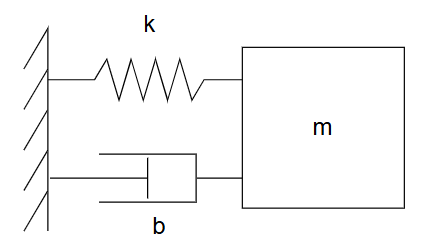

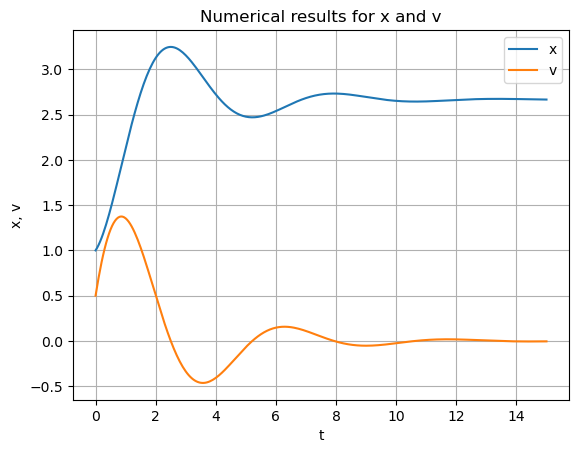

In [1]:
#import libraries
import numpy as np
from  ODE_solvers import RK4
import matplotlib.pyplot as plt

k = 15
m = 10
b = 8
fin = 40
B = np.array([0,1/m]) 
A = np.array([[0, 1], [-k/m, -b/m]])

#Define initial conditions
x_0 = 1
v_0 = 0.5

# Define vector of RHS of first order equations 
def F(t,s):
    F = np.dot(A,s)+np.dot(B,fin)      #Performs the matrix multiplication
    return F

t = 0.0                   # Start of integration
tf = 15                   # End of integration
s = np.array([x_0, v_0])  # initial values for states 
dt = 0.05                  # step size
#Use 4th order RK method to numerically solve
T,S = RK4(F,t,s,tf,dt)

plt.plot(T,S[:,0],'-',T,S[:,1],'-')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('x, v')
plt.legend(('x','v'),loc=0)
plt.title('Numerical results for x and v')
plt.show()

**Verification:** Checking to see if the numerical solution obeys energy conservation

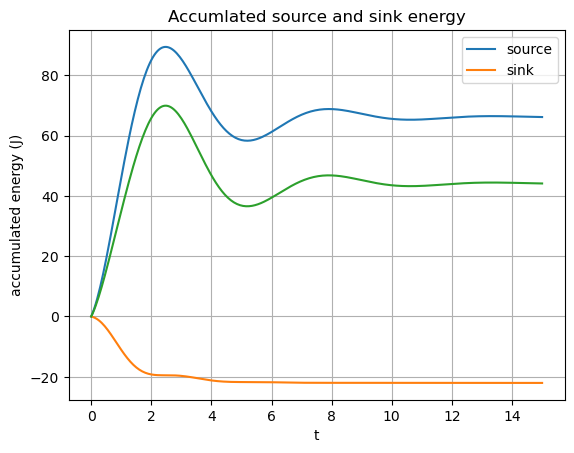

In [16]:
#Redefining the state variables in terms of x and v:
x =S.T[0]
v =S.T[1]
steps = len(x)

#Define the total accumulated source energy at time,t
def E_source(t_cur):
    EE = np.zeros(steps)
    step_cur = len(t_cur)
    for i in range(1,step_cur):
        EE[i] = EE[i-1]+fin*v[i]*dt
    return EE
E_Source = E_source(T)

#Define the total accumulated sink energy at time,t
def E_sink(t_cur):
    EE = np.zeros(steps)
    step_cur = len(t_cur)
    for i in range(1,step_cur):
        EE[i] = EE[i-1]-b*v[i]*v[i]*dt
    return EE
E_Source = E_source(T)
E_Sink = E_sink(T)
E_boundary = E_Source+E_Sink

plt.plot(T,E_Source,'-',T,E_Sink,'-',T,E_boundary,'-')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('accumulated energy (J)')
plt.legend(('source','sink'),loc=0)
plt.title('Accumlated source and sink energy')
plt.show()